# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

%matplotlib inline
path_to_data="../data/train"

# Chargement des données
Utilisation d'une dataframe panda

In [2]:
data = {}
data_files = os.listdir(path_to_data)

for datafile in tqdm.tqdm(data_files):
    if "input" in datafile:
        data["input"] = pd.read_csv(
            os.path.join(path_to_data, datafile), delimiter=",", decimal="."
        )
    else:
        data["target"] = pd.read_csv(
            os.path.join(path_to_data, datafile), delimiter=",", decimal="."
        )

100%|██████████| 2/2 [00:00<00:00, 45.22it/s]


# Description des données

In [27]:
len(data['input'])

1087

In [28]:
len(data['target'])

1087

In [29]:
data['input'].describe()

,_ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,...,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,544.000000,0.324930,0.598499,0.004600,0.092906,0.096465,0.023919,0.007820,0.132674,0.092115,...,0.050943,0.056610,0.027599,0.134391,0.155980,0.009972,0.004600,0.016559,0.031279,0.002883
std,313.934176,0.127109,0.112948,0.052357,0.101186,0.113275,0.152867,0.072343,0.088995,0.084020,...,0.098945,0.136687,0.163896,0.176417,0.103498,0.062025,0.067697,0.086610,0.174150,0.041849
min,1.000000,0.000000,-0.045405,0.000000,0.000000,0.000000,0.000000,0.000000,0.006862,0.000000,...,0.000000,-0.007090,0.000000,-0.001502,0.004104,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.500000,0.248555,0.540171,0.000000,0.028135,0.020824,0.000000,0.000000,0.083894,0.046002,...,0.000000,0.000000,0.000000,0.000000,0.095754,0.000000,0.000000,0.000000,0.000000,0.000000
50%,544.000000,0.303300,0.608965,0.000000,0.066682,0.072494,0.000000,0.000000,0.112968,0.077890,...,0.000000,0.000000,0.000000,0.049144,0.135002,0.000000,0.000000,0.000000,0.000000,0.000000
75%,815.500000,0.369575,0.668921,0.000000,0.134380,0.131796,0.000000,0.000000,0.149047,0.112930,...,0.125000,0.000000,0.000000,0.227662,0.177760,0.000000,0.000000,0.000000,0.000000,0.000000
max,1087.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Separation du dataset en train-set et test-set

In [20]:
from sklearn.model_selection import train_test_split

filter_sample = np.where(data["target"]["Y"] == 0)[0]

target = data['target'].drop(columns=["_ID"])

features = data['input'].drop(columns=["_ID"])

# features = features[['X2', 'X9', 'X12', 'X14', 'X21', 'X26', 'X27', 'X33', 'X41', 'X58', 'X67', 'X69', 'X72', 'X77', 'X79', 'X85', 'X89', 'X99', 'X102', 'X106', 'X107', 'X108', 'X120', 'X126', 'X129', 'X132', 'X133', 'X142', 'X146', 'X150', 'X155', 'X157', 'X159', 'X171', 'X179', 'X194', 'X203', 'X207', 'X214', 'X223', 'X225', 'X226', 'X230', 'X231', 'X232', 'X233', 'X237', 'X243', 'X252', 'X253', 'X261', 'X264', 'X280', 'X284', 'X288', 'X300', 'X309', 'X316', 'X330', 'X333']]

x_train, x_valid, y_train, y_valid = train_test_split(features,target,test_size=0.20,random_state=0)
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(869, 295) (218, 295) (869,) (218,)


# Modele de Régression

## Importation des métriques

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

## Random Forest

### Prédiction

In [58]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


rfr = ExtraTreesRegressor(bootstrap=False, 
                            max_depth=24, 
                            max_features=100,
                            min_samples_split=4, 
                            n_estimators=80, 
                            n_jobs=-1)

rfr.fit(x_train, y_train)
print(rfr.score(x_train, y_train))

y_pred_rfr = rfr.predict(x_valid)
print(y_pred_rfr.shape)
print(y_valid.shape)

print("R2_score : ", r2_score(y_valid, y_pred_rfr))
print("MSE : ", mean_squared_error(y_valid, y_pred_rfr))

print("MSE : ", mean_squared_error(y_train, rfr.predict(x_train)))



0.9931622401954187
(218,)
(218,)
R2_score :  0.5980093956000501
MSE :  0.03913544311556372
MSE :  0.0006828526527588776


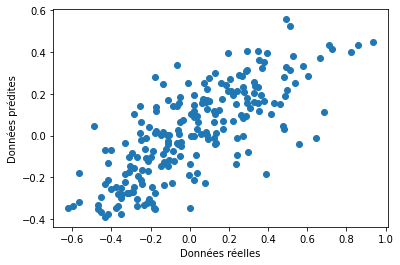

In [12]:
plt.plot(y_valid, y_pred_rfr, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

In [59]:
data_files = os.listdir('../data/test')

for datafile in tqdm.tqdm(data_files):
    if "input" in datafile:
        test_data = pd.read_csv(
            os.path.join('../data/test', datafile), delimiter=",", decimal="."
        )

test_data.head()

100%|██████████| 1/1 [00:00<00:00, 28.84it/s]


,_ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339
0,1088,0.421261,0.546021,0,0.029268,0.000000,0,0,0.062175,0.059580,...,0.0,0.224574,0,0.000000,0.064333,0,0,0.0,0,0.0
1,1089,0.336232,0.727931,0,0.134967,0.194293,0,0,0.183858,0.099622,...,0.0,0.000000,0,0.170102,0.195474,0,0,0.0,0,0.0
2,1090,0.335788,0.567076,0,0.108601,0.040054,0,0,0.089720,0.078247,...,0.0,0.000000,0,0.177861,0.107409,0,0,0.0,0,0.0
3,1091,0.328875,0.580493,0,0.147206,0.046594,0,0,0.103053,0.063454,...,0.0,0.000000,0,0.000000,0.118341,0,0,0.0,0,0.0
4,1092,0.248126,0.658921,0,0.000000,0.000000,0,0,0.098379,0.002061,...,0.0,0.000000,0,0.261934,0.159203,0,0,0.0,0,0.0


In [60]:
x_test = test_data.drop(columns=["_ID"])

In [61]:
y_pred_test = rfr.predict(x_test)
y_pred_test.shape

(272,)

In [62]:
test_data['_ID'].to_numpy().shape


(272,)

In [63]:
output = np.concatenate((test_data["_ID"].to_numpy().reshape(-1,1), y_pred_test.reshape(-1,1)), axis=1)

In [64]:
output_df = pd.DataFrame(output, columns=['_ID', 'Y'])
output_df = output_df.astype({'_ID': 'int32'})
output_df.to_csv('output.csv', index=False)

In [57]:
np.arange(18,28,1)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

# Enregistrement des modèles

In [ ]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_2.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

with open(modele_path + 'random_forest_rm_2.pkl', 'wb') as f:
    pickle.dump(rfr, f)
    
with open(modele_path + 'random_forest_A_2.pkl', 'wb') as f:
    pickle.dump(rfr_A, f)  


# Chargement des modèles

In [ ]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_2.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_2.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_2.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


-------------------------
Résistance mécanique Rm
-------------------------
Train:  0.9978717285976809
Test:  0.688109371453149
-------------------------
Résistance élastique Re02
-------------------------
Train:  0.9990943697802303
Test:  0.8004542256582448
mse
-------------------------
Allongement à la rupture A%
-------------------------
Train:  0.9991336403334773
Test:  0.8387497814415037
